# Enunciado

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import ipywidgets as widgets
import time as t

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y configure la función `pd.read_csv` para importarlo como un `DataFrame`

1. Utilice el nombre de país como índice
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para las columnas asociadas a fechas
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país

In [2]:
df = pd.read_csv('data/covid19_confirmados.csv',index_col=1)  
df


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


In [3]:
print("Eliminando Lat y Long")
df.drop(['Lat', 'Long'], axis=1, inplace=True)
#df

Eliminando Lat y Long


In [4]:
lista_columnas = [df.columns[0]]  
for i in range(1,df.shape[1],1):
    lista_columnas.append(pd.Timestamp(df.columns[i]).date())
df.columns = lista_columnas 
#df

In [5]:
print("Aqui se reduce la columna Province/State y se deja la suma de provincias por pais")
df = df.groupby(by='Country/Region').sum() # reduce la columna Province/State
#df

Aqui se reduce la columna Province/State y se deja la suma de provincias por pais


Explore el archivo `population_by_country_2020.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores

In [6]:
df_population = pd.read_csv("data/poblacion_mundial2020.csv", index_col="Country (or dependency)")

#Esta parte es especifica del problema con estados unidos, ya que en un dataframe aparece como US
# y en el otro aparece como United States, de esta forma se hara el merge correctamente para ese pais
df_population = df_population.rename({"Czech Republic (Czechia)":"Czechia", "South Korea":"Korea, South", 
               "St. Vincent & Grenadines":"Saint Vincent and the Grenadines",
               "Sao Tome & Principe":"Sao Tome and Principe",
               "Taiwan":"Taiwan*", "United States":"US", "Congo":"Congo (Brazzaville)", 
               "DR Congo":"Congo (Kinshasa)", "Côte d'Ivoire":"Cote d'Ivoire",
               "Saint Kitts & Nevis":"Saint Kitts and Nevis"}, axis='index')
df_population.drop(df_population.columns.difference(['Population (2020)']), 1, inplace=True)
#df_population


Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final

In [7]:
df2 = pd.merge(left=df, right=df_population, left_index=True, right_on='Country (or dependency)', how='inner')
# Para eliminar las filas en que no hay datos de poblacion, descomentar la siguiente linea
#df2.dropna("Population (2020)) # elimina las filas con NaN en el indice  
#df2 = df2.set_index("Country (or dependency)")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#df2

Escriba funciones para el procedimiento anterior y aplíquelas en los archivos `covid19_recuperados.csv` y `covid19_muertes.csv` 

In [8]:
def limpia_df(csv_path):
    df = pd.read_csv(csv_path, index_col="Country/Region")
    df.drop(['Lat', 'Long'], axis=1, inplace=True)
    lista_columnas = [df.columns[0]]  
    for i in range(1,df.shape[1],1):
        lista_columnas.append(pd.Timestamp(df.columns[i]).date())
    df.columns = lista_columnas 
    df = df.groupby(by='Country/Region').sum() # reduce la columna Province/State
    df_population = pd.read_csv("data/poblacion_mundial2020.csv", index_col="Country (or dependency)")
    #Esta parte es especifica del problema con estados unidos, ya que en un dataframe aparece como US
    # y en el otro aparece como United States, de esta forma se hara el merge correctamente para ese pais
    df_population.drop(df_population.columns.difference(['Population (2020)']), 1, inplace=True)
    df_population = df_population.rename({"Czech Republic (Czechia)":"Czechia", "South Korea":"Korea, South", 
               "St. Vincent & Grenadines":"Saint Vincent and the Grenadines",
               "Sao Tome & Principe":"Sao Tome and Principe",
               "Taiwan":"Taiwan*", "United States":"US", "Congo":"Congo (Brazzaville)", 
               "DR Congo":"Congo (Kinshasa)", "Côte d'Ivoire":"Cote d'Ivoire",
               "Saint Kitts & Nevis":"Saint Kitts and Nevis"}, axis='index')
    df2 = pd.merge(left=df, right=df_population, left_index=True, right_on='Country (or dependency)', how='inner')
    # Para eliminar las filas en que no hay datos de poblacion, descomentar la siguiente linea
    #df2.dropna() # elimina las filas con NaN en el indice  
    #df2 = df2.set_index("Country (or dependency)")
    return df2

df = limpia_df("data/covid19_recuperados.csv")
#df

## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total

In [9]:
confirmados = limpia_df("data/covid19_confirmados.csv")
recuperados = limpia_df("data/covid19_recuperados.csv")
fallecidos = limpia_df("data/covid19_muertes.csv")

In [10]:
def tasas(fecha):
    fecha = pd.Timestamp(fecha).date()
    temp = confirmados[[fecha, "Population (2020)"]]
    temp.loc[:,"recuperados"] = recuperados[[fecha]]
    temp.loc[:,"fallecidos"] = fallecidos[[fecha]]
    temp.loc[:,"Tasa de incidencia"] = (temp[fecha]*100000)/temp["Population (2020)"]
    temp.loc[:,"Tasa de recuperacion"] = (temp["recuperados"]*100000)/temp["Population (2020)"]
    temp.loc[:,"Tasa de mortalidad"] = (temp["fallecidos"]*100000)/temp["Population (2020)"]
    temp = temp[["Tasa de incidencia", "Tasa de recuperacion", "Tasa de mortalidad"]]
    return temp
#tasas("2021-1-1")

## Ahora, considerando los siguientes tres puntos temporales

- 22 de Enero de 2020
- 22 de Enero de 2021
- 22 de Enero de 2022

Muestre los nombres y los valores de los 3 países con

1. La mayor y menor tasa de incidencia, respectivamente
1. La mayor y menor tasa de recuperación, respectivamente
1. La mayor y menor tasa de mortalidad, respectivamente

Muestre también la posición de Chile en el ranking

In [11]:
def display_tasas(fecha):
    temp = tasas(fecha)
    for col in temp.columns:
        temp = temp.sort_values(by=col, ascending=False) #.tail(3)
        indices = temp.head(3).index.values.tolist() + temp.tail(3).index.values.tolist()
        # Aqui se obtiene el ranking de chile segun la tasa
        print(f"Fecha {fecha}\n{col}\nRanking Chile: {temp.index.get_loc('Chile')}") 
        display(temp.loc[indices,:])
        
display_tasas("2020-1-22")
display_tasas("2021-1-22")
display_tasas("2022-1-22")

Fecha 2020-1-22
Tasa de incidencia
Ranking Chile: 98


/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be

,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
China,0.038048,NaN,NaN
Thailand,0.005728,NaN,NaN
Taiwan*,0.004197,NaN,NaN
Grenada,0.000000,NaN,NaN
Guatemala,0.000000,NaN,NaN
Zimbabwe,0.000000,NaN,NaN


Fecha 2020-1-22
Tasa de recuperacion
Ranking Chile: 98


,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
China,0.038048,NaN,NaN
Thailand,0.005728,NaN,NaN
Taiwan*,0.004197,NaN,NaN
Grenada,0.000000,NaN,NaN
Guatemala,0.000000,NaN,NaN
Zimbabwe,0.000000,NaN,NaN


Fecha 2020-1-22
Tasa de mortalidad
Ranking Chile: 98


,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
China,0.038048,NaN,NaN
Thailand,0.005728,NaN,NaN
Taiwan*,0.004197,NaN,NaN
Grenada,0.000000,NaN,NaN
Guatemala,0.000000,NaN,NaN
Zimbabwe,0.000000,NaN,NaN


Fecha 2021-1-22
Tasa de incidencia
Ranking Chile: 42


/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be

,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
Andorra,12183.161463,NaN,NaN
Montenegro,9152.018851,NaN,NaN
Czechia,8633.359536,NaN,NaN
Kiribati,0.000000,NaN,NaN
Tonga,0.000000,NaN,NaN
Palau,0.000000,NaN,NaN


Fecha 2021-1-22
Tasa de recuperacion
Ranking Chile: 42


,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
Andorra,12183.161463,NaN,NaN
Montenegro,9152.018851,NaN,NaN
Czechia,8633.359536,NaN,NaN
Kiribati,0.000000,NaN,NaN
Tonga,0.000000,NaN,NaN
Palau,0.000000,NaN,NaN


Fecha 2021-1-22
Tasa de mortalidad
Ranking Chile: 42


,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
Andorra,12183.161463,NaN,NaN
Montenegro,9152.018851,NaN,NaN
Czechia,8633.359536,NaN,NaN
Kiribati,0.000000,NaN,NaN
Tonga,0.000000,NaN,NaN
Palau,0.000000,NaN,NaN


Fecha 2022-1-22
Tasa de incidencia
Ranking Chile: 62


/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be

,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
Andorra,42730.342748,NaN,NaN
Seychelles,34907.011467,NaN,NaN
San Marino,33779.165685,NaN,NaN
Vanuatu,2.270243,NaN,NaN
Tonga,0.944278,NaN,NaN
Micronesia,0.867822,NaN,NaN


Fecha 2022-1-22
Tasa de recuperacion
Ranking Chile: 62


,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
Andorra,42730.342748,NaN,NaN
Seychelles,34907.011467,NaN,NaN
San Marino,33779.165685,NaN,NaN
Vanuatu,2.270243,NaN,NaN
Tonga,0.944278,NaN,NaN
Micronesia,0.867822,NaN,NaN


Fecha 2022-1-22
Tasa de mortalidad
Ranking Chile: 62


,Tasa de incidencia,Tasa de recuperacion,Tasa de mortalidad
Country (or dependency),,,
Andorra,42730.342748,NaN,NaN
Seychelles,34907.011467,NaN,NaN
San Marino,33779.165685,NaN,NaN
Vanuatu,2.270243,NaN,NaN
Tonga,0.944278,NaN,NaN
Micronesia,0.867822,NaN,NaN


Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2020 versus Tasa de incidencia Enero 2021
- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022
- Tasa de mortalidad Enero 2020 versus Tasa de incidencia Enero 2021
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022

En cada una:

- Utilice color para demarcar el continente de cada pais
- Realice una anotación con el código del pais cercano a su punto (https://country-code.cl/es/)
- Utilice un tamaño relativamente más grande para Chile
- Considere las buenas prácticas vistas en clases

In [12]:
def add_country_code(df):
    country_code = pd.read_csv('data/country-code.csv', sep=';')
    country_code = country_code.set_index("Name")
    temp = pd.merge(df, country_code, left_index=True, right_index=True, how='left')
    return temp
## correr solo una vez

/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/opt/homebrew/Caskroom/miniconda/base/envs/pyv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be

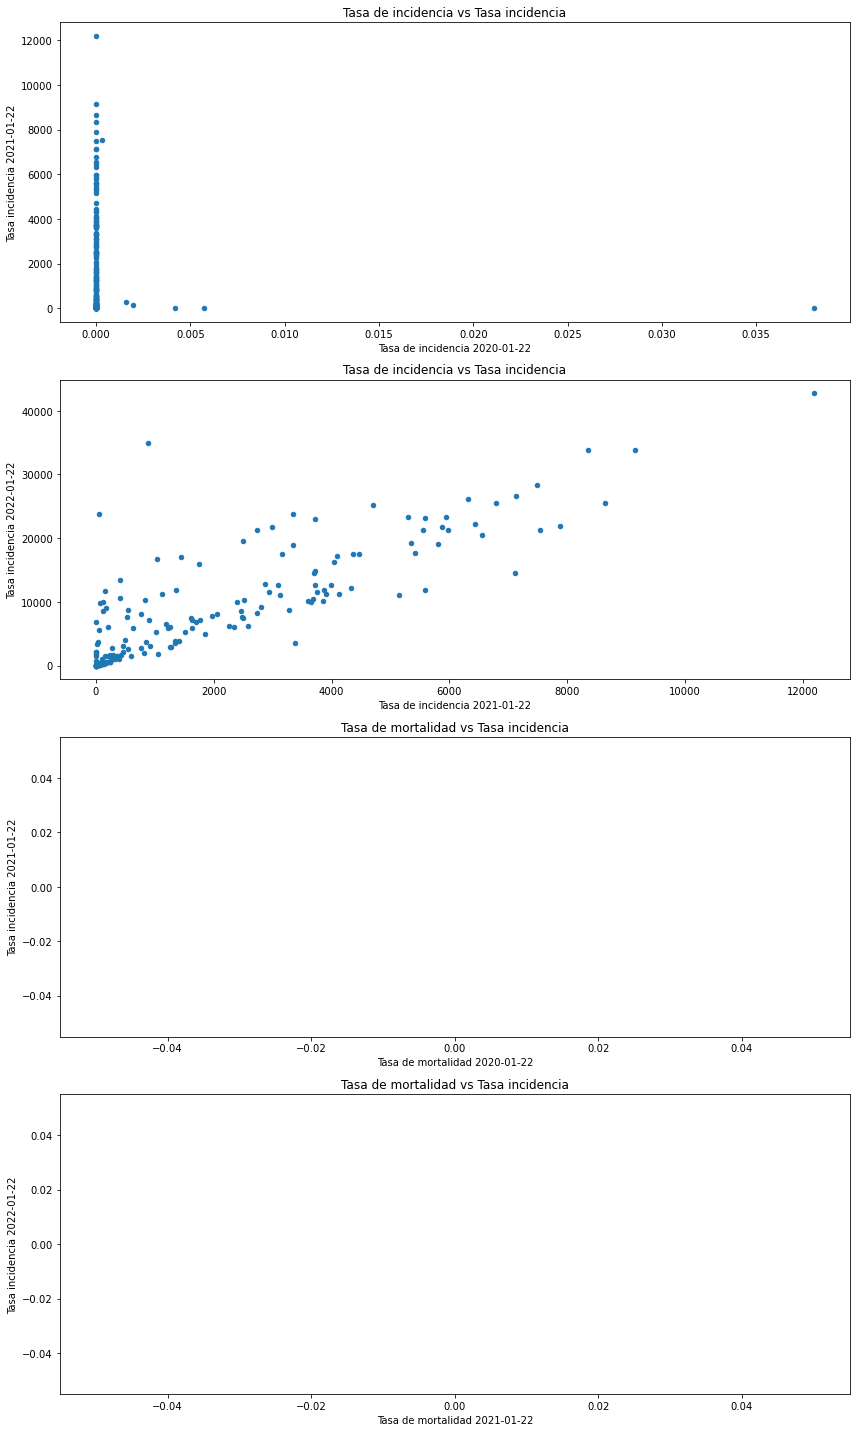

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 20), tight_layout=True)

fechas = [["2020-01-22", "2021-01-22"], ["2021-01-22", "2022-01-22"]]
i = 0 # index del plot
for tipo_tasa in ["Tasa de incidencia", "Tasa de mortalidad"]:
    for f in fechas:
        ax[i].scatter(x=tasas(f[0])[tipo_tasa], # Posición horizontal de los puntos
                   y=tasas(f[1])["Tasa de incidencia"], # Posición vertical de los puntos
                   marker='o', # forma de los puntos
                   s=20, # Tamaño de los puntos
                   #c=range(len(lista_confirmados_2021)), # Color de los puntos

                   alpha=1.) # Opacidad de los puntos

        ax[i].set_xlabel(f"{tipo_tasa} {f[0]}")
        ax[i].set_ylabel(f"Tasa incidencia {f[1]}")
        ax[i].set_title(f"{tipo_tasa} vs Tasa incidencia")
        i+=1

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile ¿A qué países del (a) mundo, (b) América Latina y (c) la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 

## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html)
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes)
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)
    



In [14]:
#temp.loc[["Chile","Canada"],:].diff(axis=1)
paises_ocde = pd.read_csv('data/ocde.csv',index_col ='Country').sort_values('Country')
paises_ocde = paises_ocde.rename({"Korea_South":"Korea, South"}, axis='index')

In [15]:
def tiempo(data):
    d = data.drop(['Population (2020)'], axis=1)
    t = []
    for dia in d.columns:
        t.append(dia)
    return t

In [16]:

pais1 = widgets.Dropdown(description="Pais 1", options=paises_ocde.index, value="Chile")
pais2 = widgets.Dropdown(description="Pais 2", options=paises_ocde.index, value="Canada")
acum_new = widgets.Dropdown(description="Datos", options=["Casos acumulados", "Casos nuevos"], value="Casos acumulados")

def func_plot(pais1, pais2, opcion, df):
    temp = df.loc[paises_ocde.index,:]
    temp.drop("Population (2020)", axis=1, inplace=True)
    fig, ax = plt.subplots(figsize=(9, 7), tight_layout=True, facecolor='w')
    ax.set_title(opcion)
    t = tiempo(df)
    if opcion=="Casos acumulados":
        ax.plot(t,temp.loc[pais1,:].values, label=pais1)
        ax.plot(t,temp.loc[pais2,:].values, label=pais2)
        ax.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1))
    else:
        ax.plot(t,temp.loc[pais1,:].diff().values, label=pais1)
        ax.plot(t,temp.loc[pais2,:].diff().values, label=pais2)
        ax.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1))
        

f1 = widgets.interactive(func_plot, pais1=pais1,pais2=pais2, opcion=acum_new, df=widgets.fixed(confirmados)) 
f2 = widgets.interactive(func_plot, pais1=pais1,pais2=pais2, opcion=acum_new, df=widgets.fixed(recuperados))
f3 = widgets.interactive(func_plot, pais1=pais1,pais2=pais2, opcion=acum_new, df=widgets.fixed(fallecidos))
children = [f1, f2, f3]
tab = widgets.Tab()
tab.children = children    
tab.set_title(0, "Confirmados")
tab.set_title(1, "Recuperados")
tab.set_title(2, "Fallecidos")
tab

## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. En particular destaque patrones y comportamientos que considere relevantes y compare lo que observa en las distintas series de tiempo. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.